# Imports

In [1]:
import numpy                as np
import matplotlib.pyplot    as plt
import sklearn.datasets     as sk

import unittest
import time

from enum import Enum

from sklearn.neighbors import KNeighborsClassifier

# Task 1 - Generate Data Sets

## 1.A - Generate Circle Dataset

The below function generates the required dataset, taking the required options as parameters for the make_circle function.
It is worth noting that although one of the parameters was "input=2", such a parameter is not listed in the function's documentation.

Source:

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles

In [2]:
X_c, y_c = sk.make_circles( n_samples       = 1000,
                            random_state    = 0, 
                            noise           = 0.2, 
                            factor          = 0.6)

print(X_c)

[[ 0.68453754  0.05906897]
 [ 0.04871873 -0.30931769]
 [-0.75002236 -0.94710257]
 ...
 [ 0.02219833  0.18878671]
 [ 0.55999692  0.33046011]
 [-0.51879918  0.32583607]]


In order to display the data the figure function from matplotlib is used  in order to create and display the scatter plot.

Numpy is then used to generate the mean and standard deviation. The distribution is also gotten from the sum amd calculated as a percentage on the total samples generated.

Distribution Type 0  :      50.0 %
Distribution Type 1  :      50.0 %

Mean                 :      -3.6787248617746296e-05
Standard deviation   :      0.6161566633207803


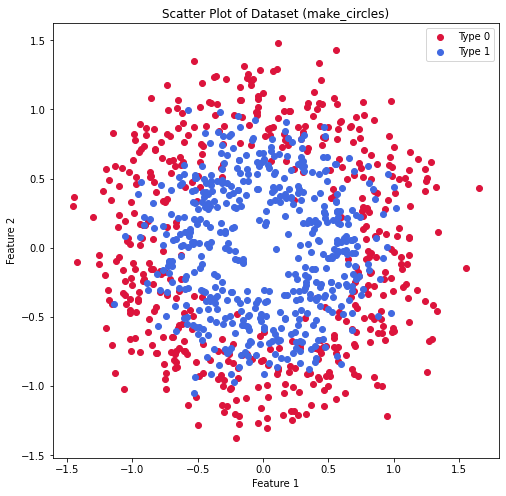

In [3]:
# --------------------- Statistics
print("Distribution Type 0  :     ", (np.sum(y_c == 0) / len(y_c)) * 100, "%")
print("Distribution Type 1  :     ", (np.sum(y_c == 1) / len(y_c)) * 100, "%")
print("")
print("Mean                 :     ", np.mean(X_c))
print("Standard deviation   :     ", np.std (X_c))

# --------------------- Scatter plot
plt.figure(figsize=(8, 8), facecolor='white')
plt.scatter(X_c[y_c == 0, 0], X_c[y_c == 0, 1], color='crimson' , label='Type 0')
plt.scatter(X_c[y_c == 1, 0], X_c[y_c == 1, 1], color='royalblue', label='Type 1')
plt.title('Scatter Plot of Dataset (make_circles)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

## 1.B Generate Blob Dataset

The below function generates the required dataset, taking the required options as parameters for the make_blobs function.

Source:

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs

In [4]:
X_b, y_b = sk.make_blobs(   n_samples       = 1000, 
                            centers         = 2, 
                            cluster_std     = 1,
                            n_features      = 2, 
                            random_state    = 0)

print(X_b)

[[0.4666179  3.86571303]
 [2.84382807 3.32650945]
 [0.61121486 2.51245978]
 ...
 [2.08302965 0.47212145]
 [1.44193252 2.76754364]
 [1.47001186 4.18768339]]


Similarly to before numpy and mathplot are used to display the related information.

Distribution Type 0  :      50.0 %
Distribution Type 1  :      50.0 %

Mean                 :      2.0376567775661902
Standard deviation   :      1.6888936374399497


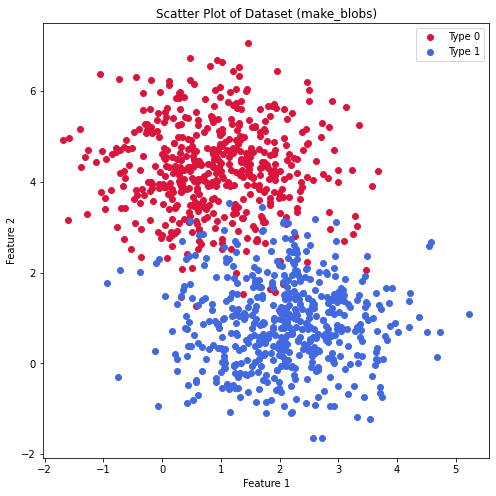

In [5]:
# --------------------- Statistics
print("Distribution Type 0  :     ", (np.sum(y_b == 0) / len(y_b)) * 100, "%")
print("Distribution Type 1  :     ", (np.sum(y_b == 1) / len(y_b)) * 100, "%")
print("")
print("Mean                 :     ", np.mean(X_b))
print("Standard deviation   :     ", np.std (X_b))

# --------------------- Scatter plot
plt.figure(figsize=(8, 8), facecolor='white')
plt.scatter(X_b[y_b == 0, 0], X_b[y_b == 0, 1], color='crimson' , label='Type 0')
plt.scatter(X_b[y_b == 1, 0], X_b[y_b == 1, 1], color='royalblue', label='Type 1')
plt.title('Scatter Plot of Dataset (make_blobs)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

___
# Task 2

## 2.A - Shuffle and split

### Knuth Shuffle

In order to implement the shuffle and split from scratch, the shuffle function is being implemented as well from scratch. The implementation is that of the Knuth Shuffle.

Source:
https://rosettacode.org/wiki/Knuth_shuffle



In [6]:
def knuth_shuffle(array):
    """
    Perform Knuth Shuffle (Fisher-Yates Shuffle) on the passed array.

    Parameters:
        array (array) : array to be shuffled

    Returns:
        (array) : the shuffled array.
    """

    length = len(array)
    for i in range(length):

        # ------------------------ Generating index
        j = np.random.randint(i, length)

        # ------------------------ Swapping
        array[i], array[j] = array[j], array[i]  

    return array

### Shuffle & Split

Here is the function that splits the data set into a training and testing data set after shuffling

In [7]:
def shuffle_and_split(X, y, test_size=0.2, random_seed=0):
    """
    Shuffle and split the dataset into train and test portions.

    Parameters:
        X : Input data (n_samples, n_features)

        y : Target labels (n_samples,)

        test_size : float, default=0.2
                    Proportion of data split (test part)

        random_seed : random seed for the np.random function

    Returns:
        X_train, X_test, y_train, y_test (array) : The train-test split of input data and target labels.
    """
    #
    assert len(X) == len(y), "X and y must have the same length."

    # Shuffle indices
    np.random.seed(random_seed)
    indices = np.arange(len(X))
    knuth_shuffle(indices)

    # Determine the number of samples in the test set
    test_samples = int(len(X) * test_size)

    # Split indices into train and test
    test_indices = indices[:test_samples]
    train_indices = indices[test_samples:]

    # Split the data using the indices
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

### Unit Tests for Shuffle and Split

In [8]:

class TestKnuthShuffle(unittest.TestCase):
    def test_knuth_shuffle(self):
        # ---------------- Generate Array
        arr = np.arange(10)

        # ---------------- Shuffle Array
        shuffled_arr = arr.copy()
        knuth_shuffle(shuffled_arr)

        # ---------------- Unit Test
        self.assertFalse (   np.array_equal(arr          ,   shuffled_arr            ))
        self.assertTrue  (   np.array_equal(sorted(arr)  ,   sorted(shuffled_arr)    ))

class TestShuffleAndSplit(unittest.TestCase):
    def test_shuffle_and_split(self):
        # ---------------- Test Data set
        X_temp = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
        y_temp = np.array([0, 1, 0, 1])

        # ---------------- Shuffle and split data set
        X_train, X_test, y_train, y_test = shuffle_and_split(X_temp, y_temp, test_size = (1/4), random_seed = 1)

        # ---------------- Unit Test
        self.assertEqual(len(X_train)   , 3)
        self.assertEqual(len(y_train)   , 3)
        self.assertEqual(len(X_test)    , 1)
        self.assertEqual(len(y_test)    , 1)


# ------------------------------ Running Unit tests

tests_to_run = [TestKnuthShuffle, TestShuffleAndSplit]

suite_2a = unittest.TestSuite()

for unit_test in tests_to_run:
    tests = unittest.TestLoader().loadTestsFromTestCase(unit_test)
    suite_2a.addTests(tests)

# ------------------------------ Run
unittest.TextTestRunner().run(suite_2a)


..
----------------------------------------------------------------------
Ran 2 tests in 0.006s

OK


<unittest.runner.TextTestResult run=2 errors=0 failures=0>

## 2.B - Binary Classification Task

### Classification Claculation Function

In [9]:
def classification_metrics(y_predicted, y_actual):
    """
    Calculates and returns the classification accuracy, recall, precision, and F1-score for a binary classification task.

    Parameters:
        y_actual (array) : the actual/true value from the test dataset
        
        y_predicted (array) : the list of predicted values generated by the model

    Returns:
        accuracy (float) : Classification accuracy.

        recall (float) : Recall (Sensitivity or True Positive Rate).

        precision (float) : Precision.
        
        f1_score (float): F1-score.
    """
    # ----------------  Calculate Correct Predictions
    correct_type_0       = np.sum((y_actual == 0) & (y_predicted == 0))
    correct_type_1       = np.sum((y_actual == 1) & (y_predicted == 1))

    # ----------------  Calculate In-Correct Predictions
    incorrect_type_0    = np.sum((y_actual == 0) & (y_predicted == 1))
    incorrect_type_1    = np.sum((y_actual == 1) & (y_predicted == 0))



    # ----------------  Calculate accuracy
    accuracy = (correct_type_0 + correct_type_1) / len(y_actual)

    # ----------------  Calculate recall
    recall = correct_type_1 / (correct_type_1 + incorrect_type_1) if (correct_type_1 + incorrect_type_1) != 0 else 0

    # ----------------  Calculate precision
    precision = correct_type_1 / (correct_type_1 + incorrect_type_0) if (correct_type_1 + incorrect_type_0) != 0 else 0

    # ----------------  Calculate F1-score
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0



    return accuracy, recall, precision, f1_score

### Unit Tests

In [10]:
class TestClassificationMetrics(unittest.TestCase):
    def test_classification_metrics(self):
        # ---------------------------------- Perfect predictions
        y_actual    = np.array([0, 1, 0, 1])
        y_predicted = np.array([0, 1, 0, 1])

        accuracy, recall, precision, f1_score = classification_metrics(y_predicted, y_actual)
        self.assertAlmostEqual(accuracy  , 1.0)
        self.assertAlmostEqual(recall    , 1.0)
        self.assertAlmostEqual(precision , 1.0)
        self.assertAlmostEqual(f1_score  , 1.0)

        # ---------------------------------- Imperfect predictions
        y_actual    = np.array([0, 1, 0, 1])
        y_predicted = np.array([1, 0, 1, 0])

        accuracy, recall, precision, f1_score = classification_metrics(y_predicted, y_actual)
        self.assertAlmostEqual(accuracy  , 0.0)
        self.assertAlmostEqual(recall    , 0.0)
        self.assertAlmostEqual(precision , 0.0)
        self.assertAlmostEqual(f1_score  , 0.0)

        # ---------------------------------- 50% accurate & 50% inaccurate predictions
        y_actual    = np.array([0, 1,   0, 1])
        y_predicted = np.array([0, 1,   1, 0])

        accuracy, recall, precision, f1_score = classification_metrics(y_predicted, y_actual)
        self.assertAlmostEqual(accuracy  , 0.5)
        self.assertAlmostEqual(recall    , 0.5)
        self.assertAlmostEqual(precision , 0.5)
        self.assertAlmostEqual(f1_score  , 0.5)


tests_to_run = [TestClassificationMetrics]

suite_2b = unittest.TestSuite()

for unit_test in tests_to_run:
    tests = unittest.TestLoader().loadTestsFromTestCase(unit_test)
    suite_2b.addTests(tests)

# ------------------------------ Run
unittest.TextTestRunner().run(suite_2b)

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


<unittest.runner.TextTestResult run=1 errors=0 failures=0>

___
# Task 3 - Developing a K-NN Model

The section below will generate a K-NN model for each of the two data sets generated in task 1. 
This means a sperate K-NN model will be generated for both the circle dataset and the blob dataset.

Source: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbo

## Circle Data Set K-NN Model

In [11]:
# =========================================== Part A ===========================================

X_train, X_test, y_train, y_test = shuffle_and_split(X_c, y_c, test_size=0.2, random_seed=0)

# ---------------- Set the test range for k
k_range = range(1,500)


# =========================================== Part B ===========================================
best_k_f1 = None
best_f1_score = 0

for k in k_range:

    # ---------------- Create the K-NN model with the desired "Number of neighbors"
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    # ---------------- Get Classification data (F1 - Score)
    _, _, _, f1 = classification_metrics(y_pred, y_test)
    
    # ---------------- Update the Highest Score
    if f1 > best_f1_score:
        best_f1_score = f1
        best_k_f1 = k

print("Best k for maximizing F1-score   : ", best_k_f1)
print("Best F1-score                    : ", best_f1_score)


# =========================================== PART C ===========================================
best_k_accuracy = None
best_accuracy = 0

for k in k_range:

    # ---------------- Create the K-NN model with the desired "Number of neighbors"
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    # ---------------- Get Classification data (Accuracy)
    accuracy, _, _, _ = classification_metrics(y_pred, y_test)
    
    # ---------------- Update the Highest Accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k_accuracy = k

print("Best k for maximizing accuracy   : ", best_k_accuracy)
print("Best accuracy                    : ", best_accuracy)

Best k for maximizing F1-score   :  62
Best F1-score                    :  0.849740932642487
Best k for maximizing accuracy   :  62
Best accuracy                    :  0.855


## Blob Data Set K-NN Model

In [12]:
# =========================================== Part A ===========================================

X_train, X_test, y_train, y_test = shuffle_and_split(X_b, y_b, test_size=0.2, random_seed=0)

# ---------------- Set the test range for k
k_range = range(1,500)


# =========================================== Part B ===========================================
best_k_f1 = None
best_f1_score = 0

for k in k_range:

    # ---------------- Create the K-NN model with the desired "Number of neighbors"
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    # ---------------- Get Classification data (F1 - Score)
    _, _, _, f1 = classification_metrics(y_pred, y_test)
    
    # ---------------- Update the Highest Score
    if f1 > best_f1_score:
        best_f1_score = f1
        best_k_f1 = k

print("Best k for maximizing F1-score   : ", best_k_f1)
print("Best F1-score                    : ", best_f1_score)


# =========================================== PART C ===========================================
best_k_accuracy = None
best_accuracy = 0

for k in k_range:

    # ---------------- Create the K-NN model with the desired "Number of neighbors"
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    # ---------------- Get Classification data (Accuracy)
    accuracy, _, _, _ = classification_metrics(y_pred, y_test)
    
    # ---------------- Update the Highest Accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k_accuracy = k

print("Best k for maximizing accuracy   : ", best_k_accuracy)
print("Best accuracy                    : ", best_accuracy)

Best k for maximizing F1-score   :  11
Best F1-score                    :  0.9459459459459459
Best k for maximizing accuracy   :  3
Best accuracy                    :  0.94


___
# Task 4 - Experiment

## 4.A - Design a Computational Experiment

In order to compare the time complexity between brute force and kd-tree search methods the following experiment can be used:

1. Firstly create a dataset of the desired type and size (either blob or circulare).
2. Secondly set up a list of training set sizes for the experiment.
3. For every size specified in the list of training set sizes
    1. Re-shuffle the dataset and split it, keeping the size
    2. Create a K-NN model and train on the training part of the dataset
    3. Start the timer
    4. Predict all the values from the testing dataset
    5. Stop the timer
    6. Calculate the difference in time
    7. Repeat from step \[3.1.\] and take the average
    8. Store the average and repeat from step \[3.\] using a different training set size
4. Plot the time records gathered from the bruth force and kd-tree methods in a graph and compare the results

## 4.B - Implementing the experiment

### Utility Functions/Classes

In [13]:
def generateCircular(n_samples = 1000):
    """
    Generates a circular dataset using the parameters specified in task 1 with the exception being n_samples which can be changed

    Parameters:
       n_samples (integer) : number of samples

    Returns:
        X : ndarray of shape (n_samples, 2)
            The generated samples.

        y : ndarray of shape (n_samples,)
            The integer labels (0 or 1) for class membership of each sample.
    """
    return sk.make_circles( n_samples       = n_samples,
                            random_state    = 0, 
                            noise           = 0.2, 
                            factor          = 0.6)
                                

def generateBlob(n_samples = 1000):
    """
    Generates a Blob dataset using the parameters specified in task 1 with the exception being n_samples which can be changed

    Parameters:
       n_samples (integer) : number of samples

    Returns:
        X : ndarray of shape (n_samples, 2)
            The generated samples.

        y : ndarray of shape (n_samples,)
            The integer labels (0 or 1) for class membership of each sample.
    """
    return sk.make_blobs(   n_samples       = n_samples, 
                            centers         = 2, 
                            cluster_std     = 1,
                            n_features      = 2, 
                            random_state    = 0)

                            
class DatasetType(Enum):
    CIRCULAR    = 1
    BLOB        = 2


### Experiment Implementation

In [14]:
def run_experiment(dataset_type, training_sizes, test_size=0.2, dataset_size=1000, num_repeats=5):
    """
    Run an experiment to compare the time complexity of brute force and kd-tree methods.

    Parameters:
        dataset_type (DatasetType): Type of dataset to generate (CIRCULAR or BLOB).
        training_sizes (list): List of training set sizes.
        test_size (float, optional): Size of the test set as a proportion of the dataset. Defaults to 0.2.
        dataset_size (int, optional): Size of the dataset. Defaults to 1000.
        num_repeats (int, optional): Number of times to repeat the experiment for averaging. Defaults to 5.

    Returns:
        kd_tree_records (list): List of average times for kd-tree method for each training set size.
        brute_force_records (list): List of average times for brute force method for each training set size.
    """
    # ----------------------------- Setting Up Data Sets
    X, y = generateCircular(dataset_size) if dataset_type == DatasetType.CIRCULAR else generateBlob(dataset_size)

    brute_force_records = []
    kd_tree_records = []
    

    for size in training_sizes:

         # ----------------------------- Validation
        if size >= dataset_size:
            raise ValueError("Training set size cannot be larger than dataset size.")
        elif size > (dataset_size-(dataset_size*test_size)):
            raise ValueError("Training set size cannot overlap with testing set size.")

        # ----------------------------- Setting Up Classifiers
        brute_force_classifier  = KNeighborsClassifier(algorithm='brute')
        kd_tree_classifier      = KNeighborsClassifier(algorithm='kd_tree')



        # ----------------------------- Repeat a number of times to get the average
        for _ in range(num_repeats):

            # ----------------------------- Shuffling and Splitting Data Sets
            X_train, X_test, y_train, y_test = shuffle_and_split(X, y, test_size, random_seed=0)

            # ----------------------------- Keep the Testing sizes the same but change the size of the training sizes to match the required list
            X_train_sample = X_train[:size]
            y_train_sample = y_train[:size]
            
            # ----------------------------- Setting Up Average
            brute_force_avg = 0
            kd_tree_avg = 0
        
            # ----------------------------- KD-Tree Time gathering 
            kd_tree_classifier.fit(X_train_sample, y_train_sample)

            start_time = time.time()
            kd_tree_classifier.predict(X_test)
            kd_tree_avg += time.time() - start_time

            # ----------------------------- Brute Force Time gathering 
            brute_force_classifier.fit(X_train_sample, y_train_sample)
            
            start_time = time.time()
            brute_force_classifier.predict(X_test)
            brute_force_avg += time.time() - start_time
            

            
        kd_tree_records.append(kd_tree_avg / num_repeats)
        brute_force_records.append(brute_force_avg / num_repeats)
    
    return kd_tree_records, brute_force_records


### Running the Experiment

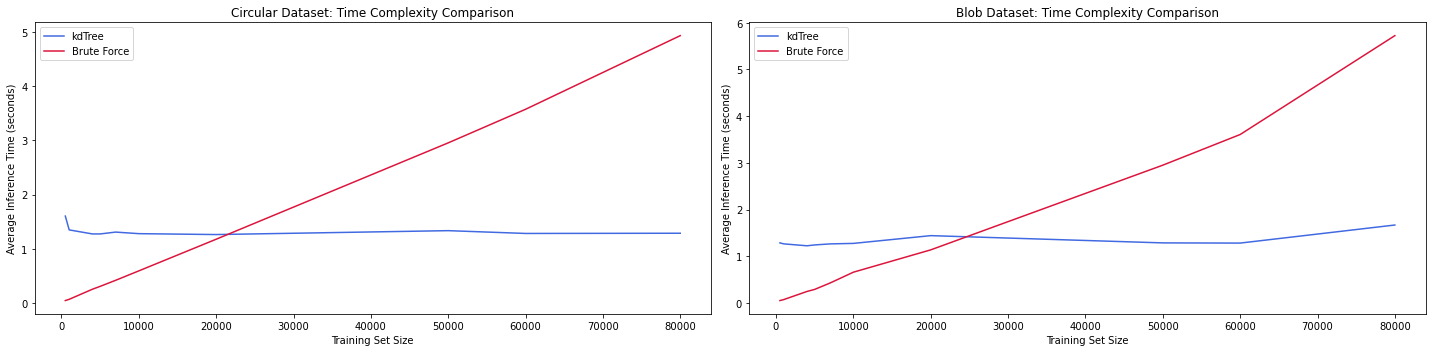

In [15]:
# ---------------------------------------- Specify experiment parameters
training_sizes = [500, 1000, 4000, 5000, 7000, 10000, 20000, 50000, 60000, 80000]
num_repeats = 1

# ---------------------------------------- Run Experiment
blob_kdtree_times, blob_brute_times         = run_experiment(DatasetType.BLOB       , training_sizes, 0.2, 100000, num_repeats)
circle_kdtree_times, circle_brute_times     = run_experiment(DatasetType.CIRCULAR   , training_sizes, 0.2, 100000, num_repeats)


# ---------------------------------------- Plot
plt.figure(figsize=(20, 5), facecolor='white')

# ----------------------- Plot the results for circular dataset
plt.subplot(1, 2, 1)
plt.plot(training_sizes, circle_kdtree_times , label='kdTree'        , color='royalblue')
plt.plot(training_sizes, circle_brute_times  , label='Brute Force'   , color='crimson')
plt.xlabel('Training Set Size')
plt.ylabel('Average Inference Time (seconds)')
plt.title('Circular Dataset: Time Complexity Comparison')
plt.legend()
# ----------------------- Plot the results for blob dataset
plt.subplot(1, 2, 2)
plt.plot(training_sizes, blob_kdtree_times   , label='kdTree'        , color='royalblue')
plt.plot(training_sizes, blob_brute_times    , label='Brute Force'   , color='crimson')
plt.xlabel('Training Set Size')
plt.ylabel('Average Inference Time (seconds)')
plt.title('Blob Dataset: Time Complexity Comparison')
plt.legend()

plt.tight_layout()
plt.show()

## Results

The results of the experiment show that at first the Brute-Force algorithm does perform better then the KD-Tree, for searching. But as the training sets become larger the difference grows substantially in the favor of the KD-Tree. This is to be expected given that best and average time complexity for a KD-Tree is $O(Nlog_{2}N + N)$). 

In conclusion the KD-Tree may be slower then the Brute-Force search at first, but quickly becomes faster when larger training sets are used.